##**Questions:**
> ### *Are the crimes equally distributed throughout the precents?*

>> Does one precinct suffer more from one type of felony vs onother?

>> Do more misdemeaors get documented in one area than the others?  

> ### *Can the crimes be predicted by age,sex and place?*
>>Further reading and research working with racial bias in data:
>>>

Dataset Dictionary


| Column Name | Description	Type | Data Type |
|-------------|------------------|-----------|
|ARREST_KEY|Randomly generated persistent ID for each arrest|plain Text|
|ARREST_DATE|Exact date of arrest for the reported event|Date & Time|
|PD_CD | Three digit internal classification code (more granular than Key Code)|Number|
|PD_DESC|Description of internal classification corresponding with PD code (more granular than Offense Description)|Plain Text|
|KY_CD|Three digit internal classification code (more general category than PD code)|Number|
|OFNS_DESC|Description of internal classification corresponding with KY code (more general category than PD description)|Plain Text|
|LAW_CODE|Law code charges corresponding to the NYS Penal Law, VTL and other various local laws|Plain Text|
|LAW_CAT_CD|Level of offense: felony, misdemeanor, violation|Plain Text|
|ARREST_BORO|Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)|Plain Text|
|ARREST_PRECINCT|Precinct where the arrest occurred|Number|
|JURISDICTION_CODE|Jurisdiction responsible for arrest.0(Patrol), 1(Transit) and 2(Housing) represent NYPD. Codes 3 and more represent non NYPD jurisdictions|Number|
|AGE_GROUP	|Perpetrator’s age within a category|Plain Text|
|PERP_SEX|Perpetrator’s sex description|Plain Text|
|PERP_RACE	|Perpetrator’s race description|Plain Text|
|X_COORD_CD|Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|Number|
|Y_COORD_CD	|Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|Number|
|Latitude|Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|Number|
|Longitude	|Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|Number|New Georeferenced Column Point|


#https://data.cityofnewyork.us/api/odata

##(140564, 19) - data on on import
##(138823, 19) - after dropping null values

In [ ]:
# coding: utf-8

#Import

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use()
%matplotlib inline

OSError: ignored

In [ ]:
# # Function to load the complete dataset and perform the data manipulations in-house
# def load_data_complete():
#     cur_dir = os.path.dirname()

In [ ]:
# Read the csv
nypd_a_y2d = pd.read_csv('/content/drive/MyDrive/PredictiveAnalytics/101/data/NYPD_Arrest_Data__Year_to_Date_.csv')


#EDA

In [ ]:
nypd_a_y2d.shape

(140564, 19)

In [ ]:
nypd_a_y2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140564 entries, 0 to 140563
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                140564 non-null  int64  
 1   ARREST_DATE               140564 non-null  object 
 2   PD_CD                     140188 non-null  float64
 3   PD_DESC                   140564 non-null  object 
 4   KY_CD                     140185 non-null  float64
 5   OFNS_DESC                 140564 non-null  object 
 6   LAW_CODE                  140564 non-null  object 
 7   LAW_CAT_CD                139202 non-null  object 
 8   ARREST_BORO               140564 non-null  object 
 9   ARREST_PRECINCT           140564 non-null  int64  
 10  JURISDICTION_CODE         140564 non-null  int64  
 11  AGE_GROUP                 140564 non-null  object 
 12  PERP_SEX                  140564 non-null  object 
 13  PERP_RACE                 140564 non-null  o

In [ ]:
nypd_a_y2d.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238859078,01/09/2022,NaN,(null),NaN,(null),PL 2650022,M,B,49,0,25-44,M,BLACK HISPANIC,1021536,251417,40.856680,-73.865212,POINT (-73.865212 40.85668)
1,239923883,01/31/2022,NaN,(null),NaN,(null),CPL5700600,9,Q,113,3,25-44,M,BLACK,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
2,239651234,01/25/2022,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,71,0,25-44,M,BLACK,998742,181235,40.664121,-73.947765,POINT (-73.9477648403751 40.664121282631)
3,241524225,03/03/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,18-24,M,BLACK,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)
4,241038267,02/22/2022,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,B,41,0,45-64,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)


Replacing the (null)s

In [ ]:
nypd_a_y2d.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                        376
PD_DESC                        0
KY_CD                        379
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1362
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [ ]:
nypd_a_y2d.replace({'(null)': np.NaN, 'nan': np.nan},inplace =True, regex= True)

In [ ]:
nypd_a_y2d.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                        376
PD_DESC                      379
KY_CD                        379
OFNS_DESC                    379
LAW_CODE                       0
LAW_CAT_CD                  1362
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [ ]:
#Look at the unique values for columns containing greater than 20 values
#We don't want TOO MUCH variability because easier to cause overfitting
for column in nypd_a_y2d.columns:
    print(column,'unique values:',len(nypd_a_y2d[column].unique()))

ARREST_KEY unique values: 140564
ARREST_DATE unique values: 273
PD_CD unique values: 246
PD_DESC unique values: 235
KY_CD unique values: 70
OFNS_DESC unique values: 65
LAW_CODE unique values: 968
LAW_CAT_CD unique values: 6
ARREST_BORO unique values: 5
ARREST_PRECINCT unique values: 77
JURISDICTION_CODE unique values: 23
AGE_GROUP unique values: 5
PERP_SEX unique values: 2
PERP_RACE unique values: 7
X_COORD_CD unique values: 22286
Y_COORD_CD unique values: 23470
Latitude unique values: 25945
Longitude unique values: 25950
New Georeferenced Column unique values: 26533


 ## Rows with nulls: new data frame
 
 nulls... is there a connection. reason for no input


In [ ]:
nypd_a_y2d2 = nypd_a_y2d[pd.isnull(nypd_a_y2d).any(axis=1)]

In [ ]:
for column in nypd_a_y2d2.columns:
    print(column,'unique values:',len(nypd_a_y2d2[column].unique()))

ARREST_KEY unique values: 1741
ARREST_DATE unique values: 248
PD_CD unique values: 7
PD_DESC unique values: 5
KY_CD unique values: 2
OFNS_DESC unique values: 2
LAW_CODE unique values: 22
LAW_CAT_CD unique values: 5
ARREST_BORO unique values: 5
ARREST_PRECINCT unique values: 75
JURISDICTION_CODE unique values: 13
AGE_GROUP unique values: 5
PERP_SEX unique values: 2
PERP_RACE unique values: 7
X_COORD_CD unique values: 510
Y_COORD_CD unique values: 509
Latitude unique values: 511
Longitude unique values: 511
New Georeferenced Column unique values: 511


In [ ]:
nypd_a_y2d2.shape

(1741, 19)

In [ ]:
nypd_a_y2d2.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                        376
PD_DESC                      379
KY_CD                        379
OFNS_DESC                    379
LAW_CODE                       0
LAW_CAT_CD                  1362
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

Top 5 precincts with most null entries are


| Precinct | Count |
|----------|-------|
|   5      |    256|
|   113    |    198|
|   10     |    135|
|   105    |    134|
|   102    |     98|



In [ ]:
nypd_a_y2d2.ARREST_PRECINCT.value_counts(sort=True).head(20)

5      256
113    198
10     135
105    134
102     98
49      87
109     83
84      64
114     50
52      37
44      36
115     27
107     25
48      25
72      19
34      18
42      18
50      18
46      17
75      17
Name: ARREST_PRECINCT, dtype: int64

In [ ]:
nypd_a_y2d2.JURISDICTION_CODE.value_counts(sort=True)

0     1540
3      161
72       7
2        5
1        5
73       5
15       4
11       4
97       3
87       3
7        2
13       1
71       1
Name: JURISDICTION_CODE, dtype: int64

OFS description: for other authorities

In [ ]:
nypd_a_y2d2.PD_DESC.value_counts(sort=True)

U.S. CODE UNCLASSIFIED             1073
FUGITIVE/OTHER JURISDICTION NYS     154
FUGITIVE/OTHER STATES               133
NYS UNCLASSIFIED                      2
Name: PD_DESC, dtype: int64

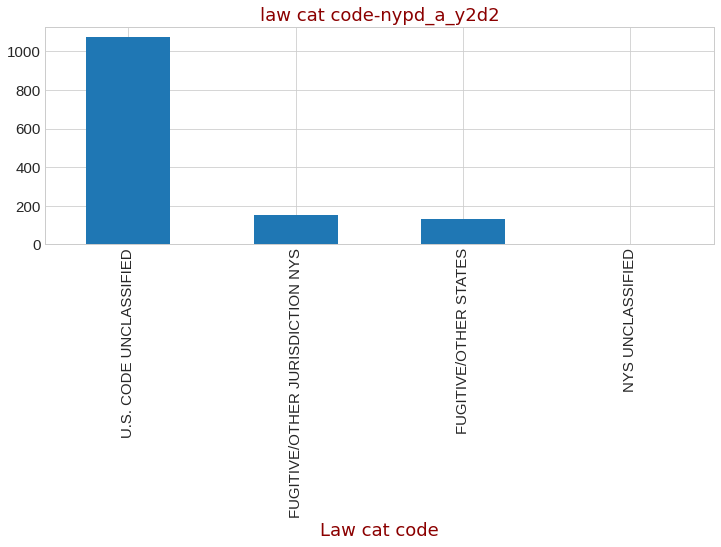

In [ ]:
font = {'family': 'sansserif','color':  'darkred','weight': 'normal','size': 16}
plt.style.use('seaborn-whitegrid')
fig = plt.figure(num=None, figsize=(12, 4))
ax = plt.axes()
ax = nypd_a_y2d2.PD_DESC.value_counts(sort=True).plot(kind='bar')
ax.set_title('law cat code-nypd_a_y2d2',fontsize=18,fontdict=font)
ax.set_xlabel("Law cat code",fontsize=18,fontdict=font)
ax.set_ylabel("",fontsize=18,fontdict=font)
ax.tick_params(labelsize=15)

In [ ]:
nypd_a_y2d2.head(50)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238859078,01/09/2022,NaN,NaN,NaN,NaN,PL 2650022,M,B,49,0,25-44,M,BLACK HISPANIC,1021536,251417,40.856680,-73.865212,POINT (-73.865212 40.85668)
1,239923883,01/31/2022,NaN,NaN,NaN,NaN,CPL5700600,9,Q,113,3,25-44,M,BLACK,1046367,186986,40.679701,-73.776047,POINT (-73.77604735 40.67970059)
10,244685468,05/06/2022,NaN,NaN,NaN,NaN,CPL5700600,9,M,14,3,18-24,M,WHITE HISPANIC,986881,214802,40.756259,-73.990501,POINT (-73.990501 40.756259)
13,251055331,09/14/2022,NaN,NaN,NaN,NaN,CPL5700600,9,Q,107,0,18-24,M,BLACK,1036628,204948,40.729059,-73.811018,POINT (-73.811018 40.729059)
14,251200177,09/16/2022,NaN,NaN,NaN,NaN,CPL5700600,9,Q,113,3,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
16,239602568,01/24/2022,NaN,NaN,NaN,NaN,CPL5700600,9,Q,114,72,25-44,M,BLACK HISPANIC,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552)
29,241320143,02/27/2022,NaN,NaN,NaN,NaN,CPL5700600,9,Q,113,3,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
31,249403232,08/11/2022,NaN,NaN,NaN,NaN,VTL11920SP,F,K,81,0,25-44,F,BLACK,1004018,187477,40.681236,-73.928728,POINT (-73.9287277 40.6812357)
39,244766325,05/08/2022,NaN,NaN,NaN,NaN,CPL5700600,9,Q,102,2,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
44,248224809,07/19/2022,NaN,NaN,NaN,NaN,CPL5700600,9,Q,102,0,18-24,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)


##Back to nypd_y2d df

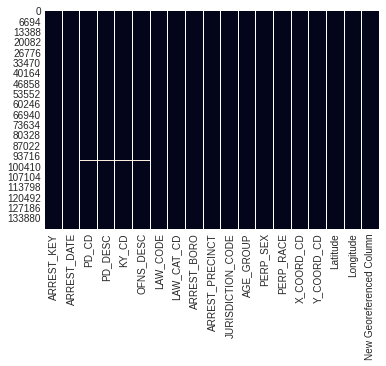

In [ ]:
# check missing values in different columns via heatmap
sns.heatmap(nypd_a_y2d.isnull(), cbar=False) 

In [ ]:
nypd_a_y2d.dropna(inplace=True)

In [ ]:
top25= nypd_a_y2d.ARREST_PRECINCT.value_counts().sort_index(ascending=False).sort_values(ascending=False).head(25)
top25

14     4346
44     4287
75     4110
40     4058
52     3789
43     3249
46     3048
114    2973
103    2949
120    2789
73     2739
47     2646
113    2483
42     2394
110    2385
109    2371
25     2321
67     2298
48     2256
41     2237
79     2181
84     2091
115    2090
18     2012
60     1972
Name: ARREST_PRECINCT, dtype: int64

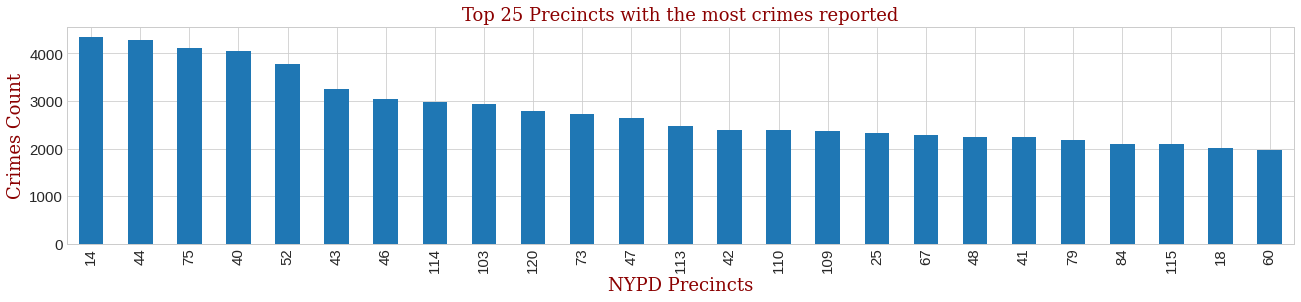

In [ ]:
font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16}
plt.style.use('seaborn-whitegrid')
fig = plt.figure(num=None, figsize=(22, 4))
ax = plt.axes()
ax = nypd_a_y2d.ARREST_PRECINCT.value_counts().sort_index(ascending=False).sort_values(ascending=False).head(25).plot(kind='bar')
ax.set_title('Top 25 Precincts with the most crimes reported',fontsize=18,fontdict=font)
ax.set_xlabel("NYPD Precincts",fontsize=18,fontdict=font)
ax.set_ylabel("Crimes Count",fontsize=18,fontdict=font)
ax.tick_params(labelsize=15)

In [ ]:
nypd_a_y2d.shape
#(140564, 19)- on import

(138823, 19)

In [ ]:
#(140564, 19) - on import
#(138823, 19) - after dropping null values

In [ ]:
nypd_a_y2d.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [ ]:
borough= {'B':'Bronx','K': 'Brooklyn', 'M': 'Manhattan','Q':"Queens", 'S':'Staten Island'}
gender = {'M': 'Male', 'F':'Female'}


In [ ]:
#Look at the unique values for each column with less than 20 unique values
for column in nypd_a_y2d.columns:
    if len(nypd_a_y2d[column].unique()) <20:
        print(column,':',nypd_a_y2d[column].unique())

LAW_CAT_CD : ['F' 'M' 'I' 'V']
ARREST_BORO : ['K' 'B' 'M' 'Q' 'S']
AGE_GROUP : ['25-44' '18-24' '45-64' '<18' '65+']
PERP_SEX : ['M' 'F']
PERP_RACE : ['BLACK' 'WHITE HISPANIC' 'WHITE' 'BLACK HISPANIC'
 'ASIAN / PACIFIC ISLANDER' 'UNKNOWN' 'AMERICAN INDIAN/ALASKAN NATIVE']


In [ ]:
for column in nypd_a_y2d.columns:
    if len(nypd_a_y2d[column].unique()) <100:
        print(column,':',nypd_a_y2d[column].unique())

KY_CD : [104. 233. 237. 230. 114. 116. 347. 118. 344. 126. 348. 881. 106. 341.
 109. 235. 351. 361. 358. 121. 105. 353. 113. 343. 107. 236. 232. 117.
 359. 119. 250. 101. 110. 111. 364. 572. 352. 355. 346. 677. 356. 112.
 578. 120. 125. 103. 363. 350. 102. 124. 365. 231. 675. 340. 880. 234.
 122. 115. 238. 345. 354. 676. 678. 571. 455. 882. 685. 349.]
OFNS_DESC : ['RAPE' 'SEX CRIMES' 'ESCAPE 3' 'JOSTLING' 'ARSON'
 'INTOXICATED & IMPAIRED DRIVING' 'DANGEROUS WEAPONS'
 'ASSAULT 3 & RELATED OFFENSES' 'MISCELLANEOUS PENAL LAW'
 'VEHICLE AND TRAFFIC LAWS' 'OTHER TRAFFIC INFRACTION' 'FELONY ASSAULT'
 'PETIT LARCENY' 'GRAND LARCENY' 'DANGEROUS DRUGS'
 'CRIMINAL MISCHIEF & RELATED OF' 'OFF. AGNST PUB ORD SENSBLTY &'
 'OFFENSES INVOLVING FRAUD' 'ROBBERY' 'UNAUTHORIZED USE OF A VEHICLE'
 'FORGERY' 'OTHER OFFENSES RELATED TO THEF' 'BURGLARY'
 'POSSESSION OF STOLEN PROPERTY' 'OFFENSES AGAINST PUBLIC ADMINI'
 'INTOXICATED/IMPAIRED DRIVING' 'CANNABIS RELATED OFFENSES'
 'MURDER & NON-NEGL. MANSLAUGHT

In [ ]:
(nypd_a_y2d.OFNS_DESC.value_counts(ascending=False).head(30))
#or 
#(nypd_a_y2d['OFNS_DESC'].value_counts(ascending=False))  
#They are the same

ASSAULT 3 & RELATED OFFENSES      23188
PETIT LARCENY                     15288
FELONY ASSAULT                    14190
MISCELLANEOUS PENAL LAW            9327
CRIMINAL MISCHIEF & RELATED OF     7717
DANGEROUS DRUGS                    7686
ROBBERY                            7310
GRAND LARCENY                      6432
DANGEROUS WEAPONS                  6011
BURGLARY                           4731
VEHICLE AND TRAFFIC LAWS           4668
OFFENSES AGAINST PUBLIC ADMINI     4203
OFFENSES INVOLVING FRAUD           3627
SEX CRIMES                         3192
OFF. AGNST PUB ORD SENSBLTY &      2938
FORGERY                            2795
POSSESSION OF STOLEN PROPERTY      1869
INTOXICATED & IMPAIRED DRIVING     1813
OTHER OFFENSES RELATED TO THEF     1804
MURDER & NON-NEGL. MANSLAUGHTE     1242
OTHER TRAFFIC INFRACTION           1238
CRIMINAL TRESPASS                  1177
GRAND LARCENY OF MOTOR VEHICLE      992
OFFENSES AGAINST THE PERSON         755
RAPE                                569


In [ ]:
nypd_a_y2d.PD_DESC.count()

138823

##Cleaning

In [ ]:
# # Converting the date column to its specified data type
# nypd_a_y2d['ARREST_DATE'] = pd.to_datetime(nypd_a_y2d.ARREST_DATE)

In [ ]:
# # Creating three new columns for easy querying
# nypd_a_y2d['YEAR'] = nypd_a_y2d.ARREST_DATE.dt.year
# nypd_a_y2d['MONTH'] = nypd_a_y2d.ARREST_DATE.dt.month
# nypd_a_y2d['DAY'] = nypd_a_y2d.ARREST_DATE.dt.day

In [ ]:
# # Considering columns beneficial for visualizing 
# nypd_a_y2d = nypd_a_y2d[['ARREST_DATE','AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'PD_DESC', 'OFNS_DESC', 'X_COORD_CD','Y_COORD_CD', 'Latitude', 'Longitude']]